# Developing a moddel for predicting F1 score

**Building model for `IDLE/OTHER` activites which can predict f1 score**

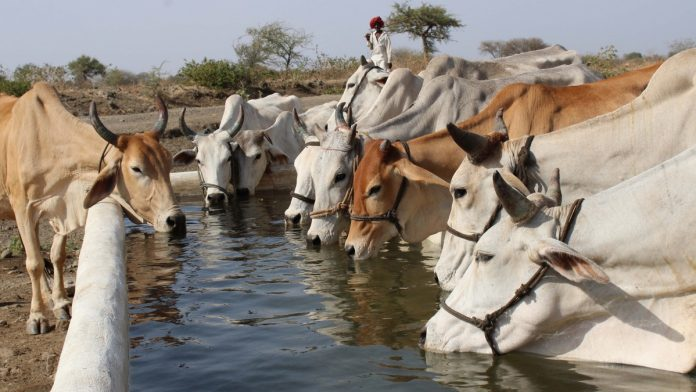

In [33]:
Image("cows-1-696x392-1.png")

In [11]:
#Importing tools we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image


%matplotlib inline

In [2]:
#Importing dataset
df =pd.read_csv("I9_train.csv")

In [3]:
df

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
0,1628329681,-0.280762,0.947754,-0.058105,1.220703,-1.342773,0.061035,-249.0,1354.5,567.0,9
1,1628329681,-0.278809,0.952148,-0.057617,1.098633,2.624512,0.366211,-231.0,1363.5,571.5,9
2,1628329681,-0.278320,0.955078,-0.065430,0.244141,1.220703,0.549316,-226.5,1341.0,570.0,9
3,1628329681,-0.278320,0.956055,-0.052734,0.427246,-0.427246,0.366211,-244.5,1345.5,579.0,9
4,1628329681,-0.281738,0.958984,-0.059082,0.183106,-0.366211,-0.244141,-244.5,1359.0,579.0,9
...,...,...,...,...,...,...,...,...,...,...,...
405258,1628341587,0.517090,0.680176,-0.476074,-0.244141,-3.479004,-3.356934,-984.0,663.0,880.5,9
405259,1628341587,0.516113,0.686523,-0.475586,0.854492,-3.967285,-3.723145,-984.0,660.0,867.0,9
405260,1628341587,0.519043,0.693359,-0.488770,0.671387,-3.417969,-4.150391,-991.5,667.5,874.5,9
405261,1628341587,0.520508,0.687988,-0.482422,-0.244141,-3.051758,-3.417969,-987.0,663.0,865.5,9


In [5]:
df.dtypes

time       int64
acc_x    float64
acc_y    float64
acc_z    float64
gyr_x    float64
gyr_y    float64
gyr_z    float64
mag_x    float64
mag_y    float64
mag_z    float64
label      int64
dtype: object

In [6]:
df.isna().sum()

time     0
acc_x    0
acc_y    0
acc_z    0
gyr_x    0
gyr_y    0
gyr_z    0
mag_x    0
mag_y    0
mag_z    0
label    0
dtype: int64

In [7]:
df.describe()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
count,4.052630e+05,405263.000000,405263.000000,405263.000000,405263.000000,405263.000000,405263.000000,405263.000000,405263.000000,405263.000000,405263.0
mean,1.628154e+09,-0.305706,0.722169,-0.137950,0.973124,-1.854139,-0.605654,-389.666243,743.303371,243.456892,9.0
std,1.061795e+05,0.315757,0.219620,0.439794,3.572683,4.926621,3.117292,272.366494,392.230091,441.899607,0.0
min,1.628067e+09,-2.267578,-1.687988,-3.583984,-329.162598,-440.002441,-145.324707,-1176.000000,-303.000000,-675.000000,9.0
25%,1.628099e+09,-0.479004,0.638672,-0.562012,0.366211,-2.624512,-1.098633,-511.500000,598.500000,120.000000,9.0
50%,1.628100e+09,-0.445801,0.785645,-0.295410,0.915527,-1.953125,-0.610352,-450.000000,969.000000,474.000000,9.0
75%,1.628131e+09,-0.296387,0.824219,0.278320,1.586914,-1.159668,-0.122070,-234.000000,1014.000000,574.500000,9.0
max,1.628417e+09,1.315430,3.639160,3.781738,351.501465,578.430176,119.018555,382.500000,1383.000000,954.000000,9.0


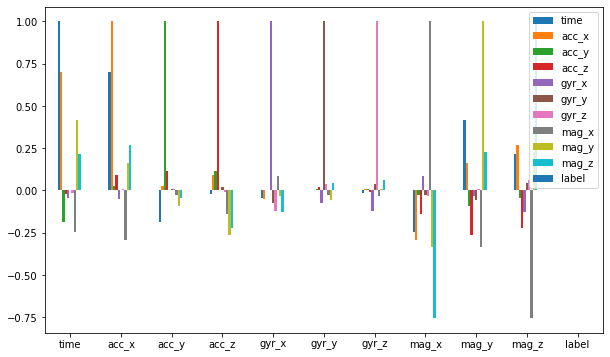

In [9]:
df.corr().plot(kind="bar",
              figsize=(10,6))
plt.xticks(rotation=0);

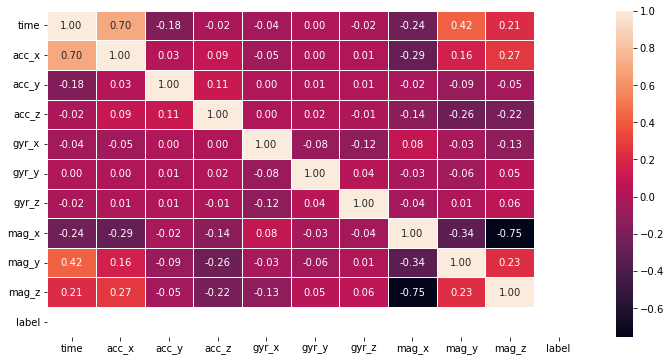

In [17]:
corr_mat= df.corr()
fig,ax = plt.subplots(figsize=(12,6))
ax=sns.heatmap(corr_mat,
               annot=True,
               linewidths=0.5,
               fmt=".2f")

In [18]:
#Import train, test and split from sklearn model seleaction
from sklearn.model_selection import train_test_split

#Creating X & y labels
X = df.drop("label",axis=1)
y = df["label"]

#Spliting the data into training  and testing
X_train, X_test ,y_train , y_test = train_test_split(X,y, test_size=0.2)

In [19]:
X_train

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
136943,1628066624,-0.446777,0.798340,0.437500,0.671387,-0.854492,-0.976563,-450.0,130.5,121.5
323458,1628100907,-0.491699,0.632812,-0.566406,1.464844,-2.929688,0.427246,-426.0,999.0,495.0
215988,1628092378,-0.369141,0.894531,0.202148,0.671387,-2.258301,-0.244141,-670.5,1029.0,468.0
333906,1628104455,-0.467285,0.831055,0.278809,0.061035,-1.037598,-0.061035,-651.0,1006.5,318.0
150924,1628066907,-0.434570,0.809570,0.418945,0.122070,-0.671387,-0.854492,-450.0,139.5,153.0
...,...,...,...,...,...,...,...,...,...,...
389693,1628330551,-0.296875,0.943848,0.038086,0.793457,-2.014160,-0.061035,-717.0,1062.0,481.5
193840,1628099131,-0.529297,0.786133,-0.292480,1.281738,-0.915527,-1.220703,-432.0,126.0,618.0
269296,1628099704,-0.291992,0.665527,-0.656738,0.793457,-2.258301,-0.427246,-552.0,1017.0,615.0
116180,1628413534,-0.378906,-0.934082,-0.124023,1.586914,-2.990723,-1.037598,-10.5,147.0,-403.5


In [20]:
X_test

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
339979,1628104581,-0.453613,0.844238,0.256836,1.037598,-1.403809,0.122070,-666.0,1026.0,336.0
190785,1628099067,-0.520996,0.777344,-0.311524,0.671387,-1.037598,-0.793457,-429.0,129.0,612.0
88678,1628130888,-0.339844,0.842285,-0.330566,1.159668,-3.967285,-0.610352,-12.0,754.5,-618.0
387071,1628330491,-0.287598,0.939453,0.032715,1.525879,-2.685547,-1.281738,-702.0,1057.5,513.0
190858,1628099068,-0.522461,0.777344,-0.313965,1.464844,-0.610352,-0.610352,-426.0,120.0,607.5
...,...,...,...,...,...,...,...,...,...,...
324319,1628100925,-0.492188,0.627441,-0.570312,0.549316,-2.075195,-14.892578,-403.5,1000.5,510.0
323725,1628100913,-0.478516,0.635742,-0.564941,0.915527,-2.136230,0.000000,-444.0,1014.0,514.5
377743,1628318850,0.037109,0.749023,-0.628906,0.915527,-6.591797,-1.770020,-681.0,1029.0,571.5
11336,1628330339,-0.208008,0.967773,0.022461,0.305176,-1.220703,-0.610352,-238.5,1348.5,588.0


In [21]:
y_test

339979    9
190785    9
88678     9
387071    9
190858    9
         ..
324319    9
323725    9
377743    9
11336     9
351010    9
Name: label, Length: 81053, dtype: int64

In [22]:
y_train

136943    9
323458    9
215988    9
333906    9
150924    9
         ..
389693    9
193840    9
269296    9
116180    9
313008    9
Name: label, Length: 324210, dtype: int64

In [24]:
#Importing RandomForestRegressor from sklearn ensamble module
from sklearn.ensemble import RandomForestRegressor


clf = RandomForestRegressor()

In [25]:
#Fitting a model
clf.fit(X_train, y_train)

RandomForestRegressor()

In [26]:
clf.fit(X_test,y_test)

RandomForestRegressor()

In [27]:
clf.score(X_train,y_train)

1.0

In [28]:
clf.score(X_test,y_test)

1.0

In [29]:
y_pred=clf.predict(X_test)

In [30]:
y_pred

array([9., 9., 9., ..., 9., 9., 9.])

In [31]:
#Classification reports
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           9       1.00      1.00      1.00     81053

    accuracy                           1.00     81053
   macro avg       1.00      1.00      1.00     81053
weighted avg       1.00      1.00      1.00     81053



In [32]:
#f1 score
from sklearn.metrics import f1_score

f1_score(y_test,y_pred, average="weighted")

1.0